In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
import gc
import numpy as np
from sklearn.datasets import load_files

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ" -O 10_painting.zip && rm -rf /tmp/cookies.txt

--2023-06-26 04:06:40--  https://docs.google.com/uc?export=download&confirm=t&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ
Resolving docs.google.com (docs.google.com)... 142.250.128.101, 142.250.128.102, 142.250.128.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eodcpa64ouv7piuoge41982p2to04dm5/1687752375000/14533323077134147075/*/1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ?e=download&uuid=b721a40c-85e7-446b-800d-34447ba9d4cc [following]
--2023-06-26 04:06:40--  https://doc-00-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eodcpa64ouv7piuoge41982p2to04dm5/1687752375000/14533323077134147075/*/1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ?e=download&uuid=b721a40c-85e7-446b-800d-34447ba9d4cc
Resolving doc-00-3c-docs.googleusercontent.com (doc-00-3c-docs.googleusercontent.com)... 74.125.126.1

In [3]:
!unzip -q 10_painting.zip

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D" -O 10_real.zip && rm -rf /tmp/cookies.txt

--2023-06-26 04:06:44--  https://docs.google.com/uc?export=download&confirm=t&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D
Resolving docs.google.com (docs.google.com)... 142.250.128.101, 142.250.128.102, 142.250.128.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3msaeu1ou5oqt8epkuuihluf0ob6fvil/1687752375000/14533323077134147075/*/1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D?e=download&uuid=83100da4-c078-4e1d-9e5f-f7ca0bf2c9fe [following]
--2023-06-26 04:06:44--  https://doc-0c-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3msaeu1ou5oqt8epkuuihluf0ob6fvil/1687752375000/14533323077134147075/*/1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D?e=download&uuid=83100da4-c078-4e1d-9e5f-f7ca0bf2c9fe
Resolving doc-0c-3c-docs.googleusercontent.com (doc-0c-3c-docs.googleusercontent.com)... 74.125.126.1

In [5]:
!unzip -q 10_real.zip

In [6]:
real_images = tf.keras.utils.image_dataset_from_directory(
    directory='real/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=((32, 32)),
)

painting_images = tf.keras.utils.image_dataset_from_directory(
    directory='painting/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=((32, 32)),
)

Found 4653 files belonging to 10 classes.
Found 2287 files belonging to 10 classes.


In [13]:
x_real, y_real = np.concatenate(list(real_images.map(lambda x, y: x))), np.concatenate(list(real_images.map(lambda x, y: y)))
x_paint, y_paint = np.concatenate(list(painting_images.map(lambda x, y: x))), np.concatenate(list(painting_images.map(lambda x, y: y)))

In [14]:
gc.collect()

384

In [15]:
x_real = x_real / 255.0
x_paint = x_paint / 255.0

In [16]:
x_real.shape

(4653, 32, 32, 3)

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [18]:
x_real_ = x_real.copy()
y_real_ = y_real.copy()

for i in range(19):
    aug_ds = data_augmentation(x_real).numpy()
    x_real_ = np.concatenate([x_real_, aug_ds])
    y_real_ = np.concatenate([y_real_, y_real])

In [19]:
x_real_.shape

(93060, 32, 32, 3)

In [72]:
input_1 = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_1)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)

latent = layers.Flatten()(x)



# Classification
stop_grad = layers.Lambda(lambda x: tf.keras.backend.stop_gradient(x))(latent)

classification_head = layers.Dense(256, activation='relu')(stop_grad)
classification_head = layers.Dropout(0.1)(classification_head)
classification_head = layers.Dense(128, activation='relu')(classification_head)
classification_head = layers.Dropout(0.1)(classification_head)

classification_head = layers.Dense(10, activation='softmax', name='classification_head')(classification_head)

# Decoder
d = layers.Reshape((4, 4, 64*4))(latent)
d = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(d)
d = layers.BatchNormalization()(d)
d = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(d)
d = layers.BatchNormalization()(d)
d = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(d)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='reconstruction_head')(d)

model = Model(inputs=[input_1], outputs=[decoded, classification_head], name='autoencoder')
encoder = Model(input_1, latent)
model.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 32, 32, 32)   896         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 16, 16, 32)  0           ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 16, 16, 32)   9248        ['max_pooling2d_6[0][0]']        
                                                                                        

In [73]:
gc.collect()

40378

In [74]:
model.compile(
    optimizer="adam",
    loss={
        'reconstruction_head': 'binary_crossentropy',
        'classification_head': 'categorical_crossentropy'
    },
    metrics=['accuracy']
)

In [75]:
h = model.fit(
    x=x_real_,
    y={
        'reconstruction_head': x_real_,
        'classification_head': y_real_
    },
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_split=0.15
)

Epoch 1/50
618/618 [==============================] - 15s 17ms/step - loss: 2.6873 - reconstruction_head_loss: 0.4546 - classification_head_loss: 2.2327 - reconstruction_head_accuracy: 0.5689 - classification_head_accuracy: 0.1374 - val_loss: 2.6563 - val_reconstruction_head_loss: 0.4349 - val_classification_head_loss: 2.2214 - val_reconstruction_head_accuracy: 0.5617 - val_classification_head_accuracy: 0.1444
Epoch 2/50
618/618 [==============================] - 10s 16ms/step - loss: 2.6520 - reconstruction_head_loss: 0.4293 - classification_head_loss: 2.2227 - reconstruction_head_accuracy: 0.6058 - classification_head_accuracy: 0.1466 - val_loss: 2.6428 - val_reconstruction_head_loss: 0.4275 - val_classification_head_loss: 2.2152 - val_reconstruction_head_accuracy: 0.5369 - val_classification_head_accuracy: 0.1529
Epoch 3/50
618/618 [==============================] - 9s 15ms/step - loss: 2.6401 - reconstruction_head_loss: 0.4248 - classification_head_loss: 2.2153 - reconstruction_hea

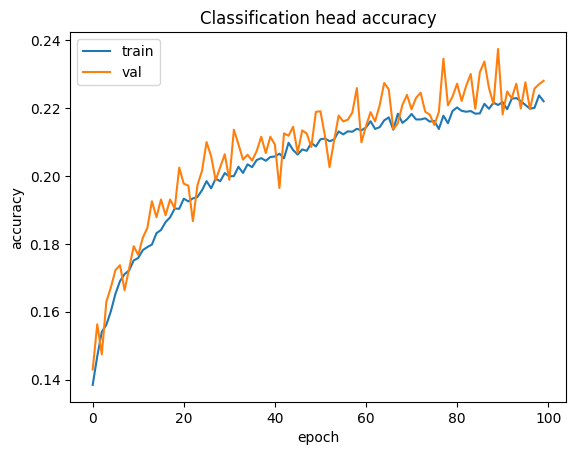

In [37]:
from matplotlib import pyplot as plt
plt.plot(h.history['classification_head_accuracy'])
plt.plot(h.history['val_classification_head_accuracy'])
plt.title('Classification head accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

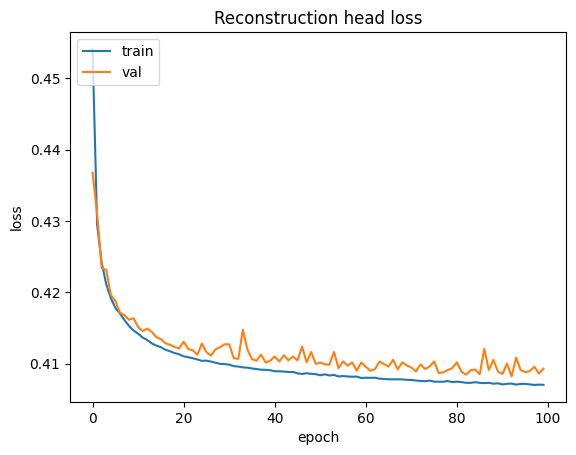

In [38]:
from matplotlib import pyplot as plt
plt.plot(h.history['reconstruction_head_loss'])
plt.plot(h.history['val_reconstruction_head_loss'])
plt.title('Reconstruction head loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
y_pred = model.predict(x_real)

146/146 [==============================] - 1s 3ms/step


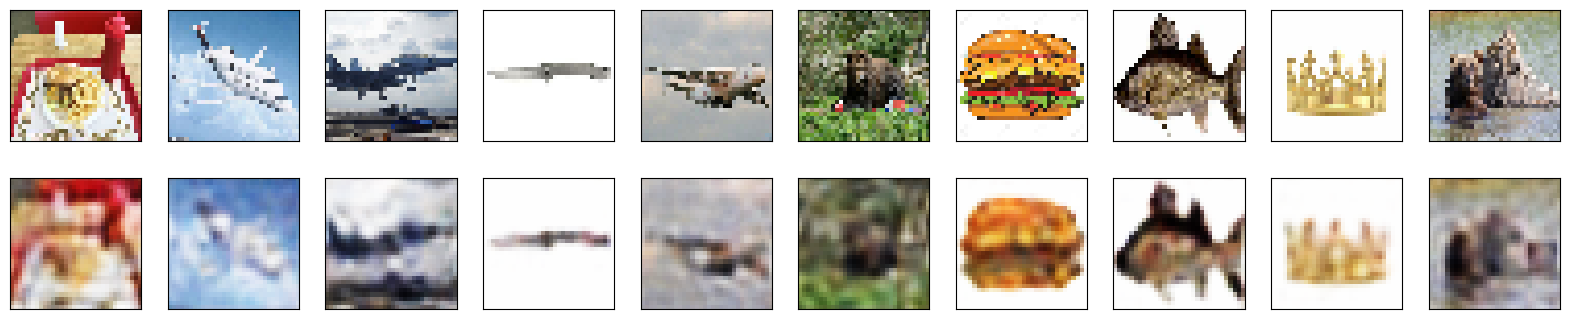

In [40]:
def display(x1, x2):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x1[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x2[0][i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

display(x_real, y_pred)

In [41]:
test_pred = model.predict(x_paint)

72/72 [==============================] - 1s 10ms/step


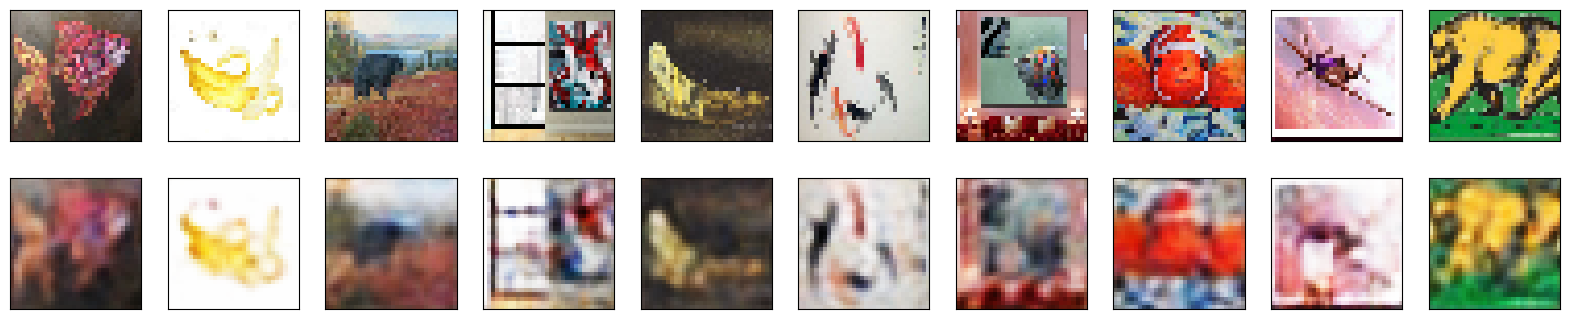

In [65]:
display(x_paint, test_pred)

In [53]:
def onehot_to_label(x):
    labels = []
    for i in range(x.shape[0]):
        labels.append(np.argmax(x[i]))
    return labels

In [49]:
def argmax(pred):
    am = []
    for i in range(pred.shape[0]):
        am.append(np.argmax(pred[i]))
    return am

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(onehot_to_label(y_paint), argmax(test_pred[1]))

0.10537822474857893

In [63]:
trainable_layers = [9, 11, 13, 15, 17, 19]

In [64]:
for i in range(len(model.layers)):
    if i not in trainable_layers:
        model.layers[i].trainable=False

In [67]:
x_paint_ = x_paint.copy()
y_paint_ = y_paint.copy()

for i in range(19):
    aug_ds = data_augmentation(x_paint).numpy()
    x_paint_ = np.concatenate([x_paint_, aug_ds])
    y_paint_ = np.concatenate([y_paint_, y_paint])

In [69]:
from sklearn.model_selection import train_test_split
x_paint_train, x_paint_test, y_paint_train, y_paint_test = train_test_split(x_paint_, y_paint_, test_size=0.2, random_state=42)

In [76]:
h = model.fit(
    x=x_paint_train,
    y={
        'reconstruction_head': x_paint_train,
        'classification_head': y_paint_train
    },
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_split=0.15
)

Epoch 1/10
243/243 [==============================] - 4s 18ms/step - loss: 2.6992 - reconstruction_head_loss: 0.5084 - classification_head_loss: 2.1908 - reconstruction_head_accuracy: 0.7367 - classification_head_accuracy: 0.1784 - val_loss: 2.6598 - val_reconstruction_head_loss: 0.5088 - val_classification_head_loss: 2.1510 - val_reconstruction_head_accuracy: 0.7373 - val_classification_head_accuracy: 0.1897
Epoch 2/10
243/243 [==============================] - 4s 14ms/step - loss: 2.6443 - reconstruction_head_loss: 0.5075 - classification_head_loss: 2.1368 - reconstruction_head_accuracy: 0.7385 - classification_head_accuracy: 0.1942 - val_loss: 2.6538 - val_reconstruction_head_loss: 0.5122 - val_classification_head_loss: 2.1416 - val_reconstruction_head_accuracy: 0.7081 - val_classification_head_accuracy: 0.1948
Epoch 3/10
243/243 [==============================] - 3s 14ms/step - loss: 2.6344 - reconstruction_head_loss: 0.5074 - classification_head_loss: 2.1269 - reconstruction_head_

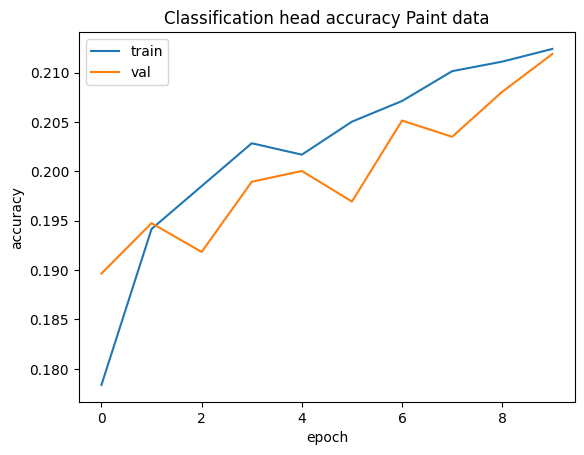

In [78]:
from matplotlib import pyplot as plt
plt.plot(h.history['classification_head_accuracy'])
plt.plot(h.history['val_classification_head_accuracy'])
plt.title('Classification head accuracy Paint data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
test_pred = model.predict(x_paint_test)

286/286 [==============================] - 1s 3ms/step


In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(onehot_to_label(y_paint_test), argmax(test_pred[1]))

0.2130520332313074